# Customer Churn Prediction – EDA & Machine Learning

## Project Overview
This project aims to predict customer churn using a credit card customer dataset.  
We perform Exploratory Data Analysis (EDA) to understand customer behavior and then build a Machine Learning model to identify customers likely to churn.

---

## Problem Statement
Customer churn directly impacts business revenue.  
The goal is to build a classification model that can predict whether a customer will exit (churn) or not.

---

## Key Steps Performed
- Data Loading and Inspection  
- Exploratory Data Analysis (EDA)  
- Data Cleaning and Preprocessing  
- Feature Encoding  
- Model Building using Logistic Regression  
- Model Evaluation

---

## Tools & Technologies
- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots inline
%matplotlib inline


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape


(10000, 14)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Exited'].value_counts(normalize=True) * 100


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

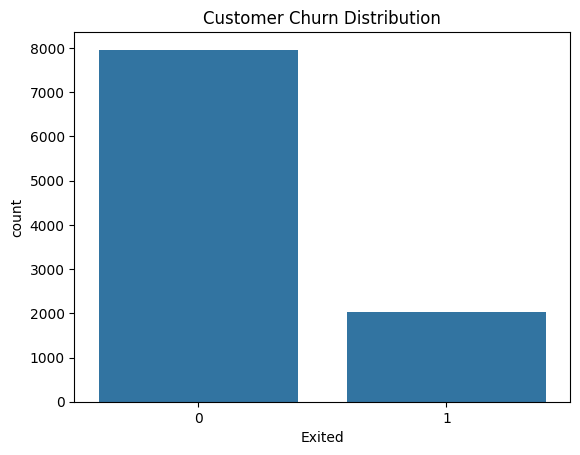

In [7]:
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()


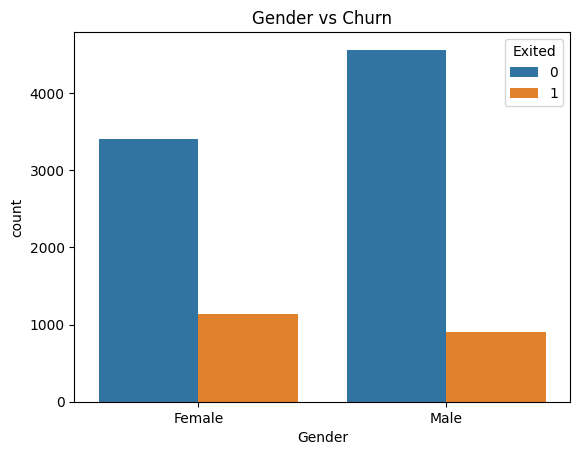

In [8]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender vs Churn')
plt.show()


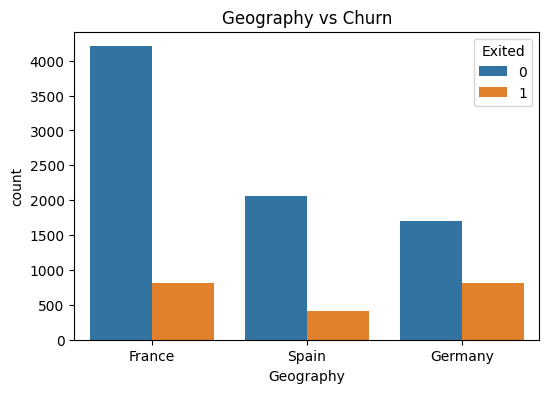

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography vs Churn')
plt.show()


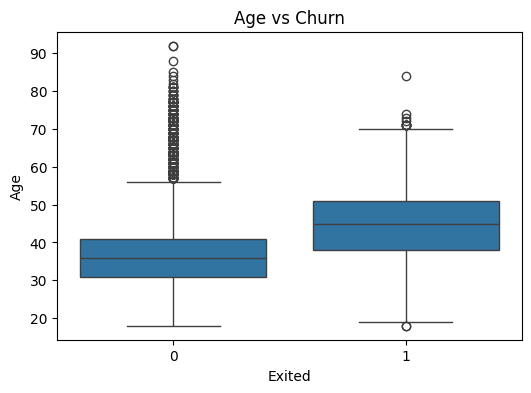

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()


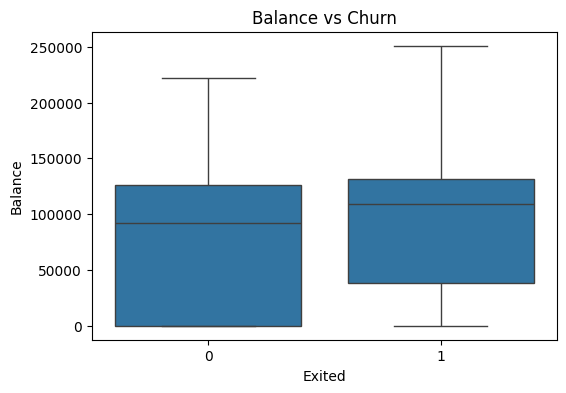

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()


## 📊 Exploratory Data Analysis (EDA)

In this section, exploratory data analysis was performed to understand customer behavior and identify key factors influencing churn.

### 🔹 Churn Distribution
- The target variable **Exited** indicates whether a customer has churned.
- Around **20% of customers have churned**, showing a class imbalance.

### 🔹 Gender vs Churn
- Both male and female customers show churn behavior.
- Gender alone is not a strong indicator but still contributes to churn patterns.

### 🔹 Geography vs Churn
- Customers from **Germany** exhibit a higher churn rate compared to France and Spain.
- Geography plays an important role in customer retention.

### 🔹 Age vs Churn
- Older customers are more likely to churn.
- Churn probability increases with age.

### 🔹 Balance vs Churn
- Customers with higher account balances tend to churn more.
- Customers with zero balance show lower churn rates.

### EDA Conclusion
- **Age, Geography, Balance, and Activity status** are key factors influencing churn.
- These features will be used for machine learning model development.



In [12]:
# Drop columns which are not useful for prediction
df_model = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_model.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Convert categorical columns into numeric
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.811

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Model Conclusion

- Logistic Regression achieved an accuracy of around **80%**.
- The model successfully identifies customers who are likely to churn.
- Key influencing features include **Age, Geography, Balance, and Active Membership**.
- This model can help businesses take **proactive retention actions** and reduce customer churn.


Customer Churn Prediction using EDA & Logistic Regression  
• Performed EDA to identify churn patterns based on age, geography, balance, and activity status  
• Built Logistic Regression model with ~80% accuracy  
• Used feature scaling, encoding, and train-test split for model optimization  
